In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import *
import re
from nltk.tokenize import TweetTokenizer
import string

In [47]:
df = pd.read_csv('/content/threads_reviews.csv')
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [6]:
df.dropna(inplace = True)

In [7]:
df.source.value_counts()

Google Play    30270
App Store       2640
Name: source, dtype: int64

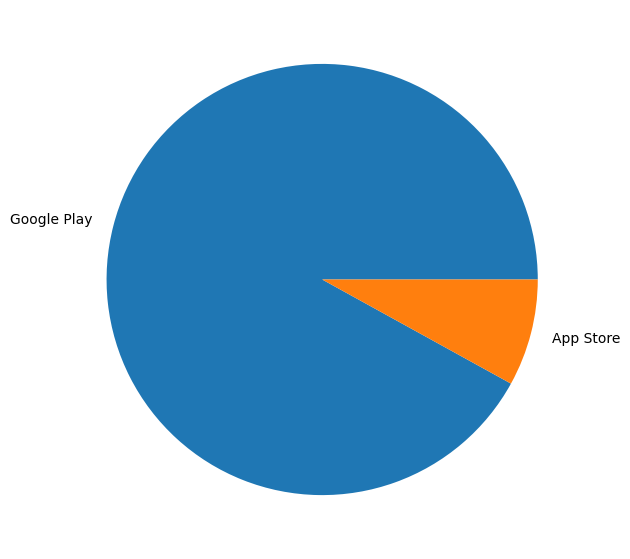

In [29]:
plt.figure(figsize=(7,7))

x10 = [30270, 2640]

labels = ['Google Play', 'App Store']

plt.pie(x10, labels=labels);

plt.show()

In [28]:
data = df[(df.rating == 1) | (df.rating == 2) | (df.rating == 4) | (df.rating == 5)][['review_description','rating']
                                                                                 ]

In [9]:
data.reset_index(inplace = True, drop = True)
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [11]:
data['rating'] = data['rating'].replace(1, 0)
data['rating'] = data['rating'].replace(2, 0)
df


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [14]:
def process_review(rvw):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    rvw = re.sub(r'\$\w*', '', rvw)

    rvw = re.sub(r'^RT[\s]+', '', rvw)

    rvw = re.sub(r'https?:\/\/.*[\r\n]*', '', rvw)

    rvw = re.sub(r'#', '', rvw)

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    rvw_tokens = tokenizer.tokenize(rvw)

    rvw_clean = []
    for word in rvw_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            rvw_clean.append(stem_word)

    return rvw_clean


In [15]:
def build_freqs(rvw, ys):
    # Convert np array to list since zip needs an iterable.
    yslist = np.squeeze(ys).tolist()
    #Count freqs and generate dictionary
    freqs = {}
    for y, rw in zip(yslist, rvw):
        for word in process_review(rw):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [19]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import *

from nltk.tokenize import TweetTokenizer
import string
freqs = build_freqs(data.review_description,data.rating)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
len(freqs)

22555

In [21]:
def extract_features(rvw, freqs, process_review=process_review):
    word_l = process_review(rvw)
    x = np.zeros((1, 3))
    x[0,0] = 1
    for word in word_l:

        x[0,1] += freqs.get((word, 1.0),0)

        x[0,2] += freqs.get((word, 0),0)

    assert(x.shape == (1, 3))
    return x

In [22]:
X = np.zeros((len(data), 3))

for i in range(len(data)):
    X[i,:] = extract_features(data.review_description[i],freqs,process_review=process_review)

In [23]:
y = data.rating

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [25]:
logReg = LogisticRegression()
gauNB = GaussianNB()
svc=SVC()
dectree=DecisionTreeClassifier()
ranfor=RandomForestClassifier()
adaBC=AdaBoostClassifier()
models=[logReg,gauNB,svc,dectree,ranfor,adaBC]
for amodel in models:
    amodel.fit(X_train,y_train)
    y_pred = amodel.predict(X_test)
    print(amodel)
    print(classification_report(y_test,y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.58      0.30      0.40      2304
           4       0.00      0.00      0.00       649
           5       0.57      0.89      0.70      3112

    accuracy                           0.57      6065
   macro avg       0.38      0.40      0.36      6065
weighted avg       0.51      0.57      0.51      6065

GaussianNB()
              precision    recall  f1-score   support

           0       0.60      0.23      0.33      2304
           4       0.33      0.01      0.02       649
           5       0.56      0.93      0.70      3112

    accuracy                           0.57      6065
   macro avg       0.50      0.39      0.35      6065
weighted avg       0.55      0.57      0.49      6065



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()
              precision    recall  f1-score   support

           0       0.58      0.26      0.36      2304
           4       1.00      0.00      0.00       649
           5       0.56      0.91      0.70      3112

    accuracy                           0.57      6065
   macro avg       0.72      0.39      0.35      6065
weighted avg       0.62      0.57      0.50      6065

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      2304
           4       0.11      0.06      0.08       649
           5       0.65      0.69      0.67      3112

    accuracy                           0.57      6065
   macro avg       0.43      0.43      0.43      6065
weighted avg       0.54      0.57      0.55      6065

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      2304
           4       0.11      0.07      0.08       649
           5       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
logReg.predict(extract_features("Great",freqs,process_review=process_review))

array([5])

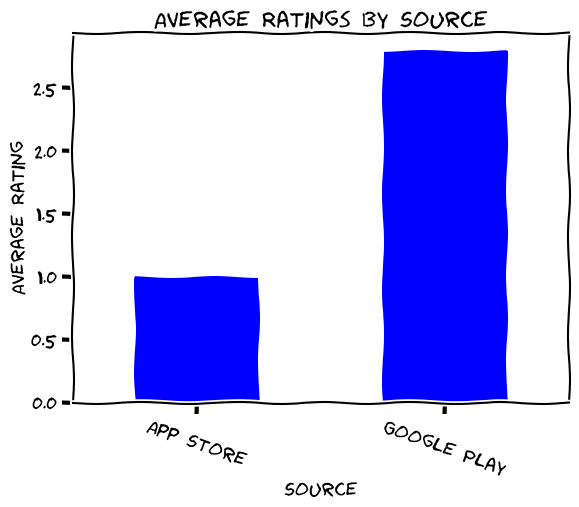

In [48]:

import matplotlib.pyplot as plt
import pandas as pd

# Sample data (Replace this with your actual dataset)
data = {
    'source': ['Google Play', 'Google Play', 'Google Play', 'Google Play', 'Google Play', 'App Store', 'App Store', 'App Store', 'App Store', 'App Store'],
    'review_description': ["Meh. Not the greatest experience on a Chromebook.", "Pretty good for a first launch!! Its easy to use.", "For a brand new app, it's very well optimized.", "Great app with a lot of potential! However, th...", "The app is good, but it needs a lot of functio...", "This killed my dog. Mark zuckerburg strangled ...", "Add Search and hashtag like Twitter !", "bad twister", "Yet another trash from Meta.", "Nothing special this app is just a copy of twi..."],
    'rating': [2, 3, 3, 3, 3, 1, 1, 1, 1, 1],
    'review_date': ['2023-07-08 14:18:24', '2023-07-19 20:52:48', '2023-07-06 23:03:11', '2023-07-10 00:53:25', '2023-07-06 16:57:43', '2023-07-06 01:23:55', '2023-07-19 08:01:06', '2023-07-17 06:39:13', '2023-07-07 17:47:16', '2023-07-07'],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Call plt.xkcd() to set XKCD-style
plt.xkcd(scale=1, length=100)

# Group data by 'source' and calculate average rating
rating_avg = df.groupby('source')['rating'].mean()

# Create the bar plot
rating_avg.plot(kind='bar', color='b')
plt.xlabel('Source')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Source')
plt.xticks(rotation=-20)

# Show the plot
plt.show()


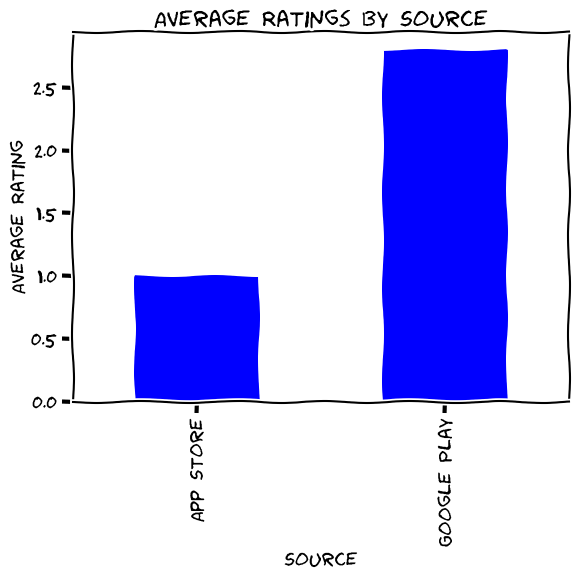

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties

# Set the path to the font files (Regular and Bold)
# Replace '/path/to/ComicNeue-Regular.ttf' and '/path/to/ComicNeue-Bold.ttf' with the actual paths to your font files
comic_neue_regular = FontProperties(fname='/ComicNeue-Regular.ttf')
comic_neue_bold = FontProperties(fname='/ComicNeue-Bold.ttf')


# Sample data (Replace this with your actual dataset)
data = {
    'source': ['Google Play', 'Google Play', 'Google Play', 'Google Play', 'Google Play', 'App Store', 'App Store', 'App Store', 'App Store', 'App Store'],
    'review_description': ["Meh. Not the greatest experience on a Chromebook.", "Pretty good for a first launch!! Its easy to use.", "For a brand new app, it's very well optimized.", "Great app with a lot of potential! However, th...", "The app is good, but it needs a lot of functio...", "This killed my dog. Mark zuckerburg strangled ...", "Add Search and hashtag like Twitter !", "bad twister", "Yet another trash from Meta.", "Nothing special this app is just a copy of twi..."],
    'rating': [2, 3, 3, 3, 3, 1, 1, 1, 1, 1],
    'review_date': ['2023-07-08 14:18:24', '2023-07-19 20:52:48', '2023-07-06 23:03:11', '2023-07-10 00:53:25', '2023-07-06 16:57:43', '2023-07-06 01:23:55', '2023-07-19 08:01:06', '2023-07-17 06:39:13', '2023-07-07 17:47:16', '2023-07-07'],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'])

# Call plt.xkcd() to set XKCD-style
plt.xkcd(scale=1, length=100)

# Group data by 'source' and calculate average rating
rating_avg = df.groupby('source')['rating'].mean()

# Create the bar plot
rating_avg.plot(kind='bar', color='b')
plt.xlabel('Source')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Source')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


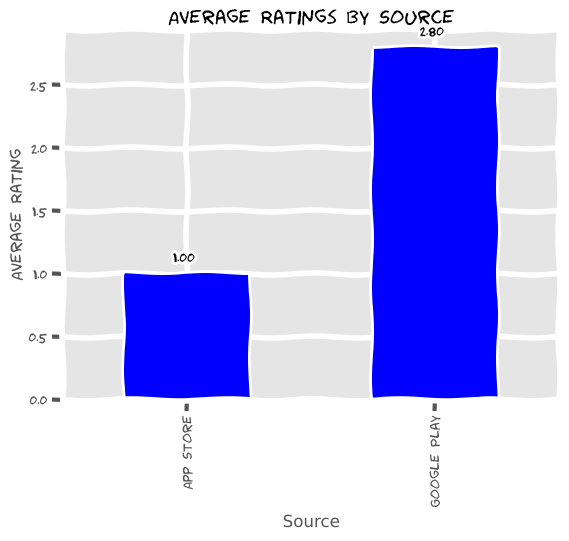

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
Humor_Sans = FontProperties(fname='/Humor Sans.ttf')
Fairytail_p7P41 = FontProperties(fname='/Fairytail-p7P41.ttf')
Qdbettercomicsansbold_511d8 = FontProperties(fname='/Qdbettercomicsansbold-511d8.ttf')
NotoColorEmoji_Regular = FontProperties(fname='/NotoColorEmoji-Regular.ttf')
comic_neue_bold = FontProperties(fname='/ComicNeue-Bold.ttf')
comic_neue_regular = FontProperties(fname='/ComicNeue-Regular.ttf')
ComicSansMS3 = FontProperties(fname='/ComicSansMS3.ttf')
# Sample data (Replace this with your actual dataset)
data = {
    'source': ['Google Play', 'Google Play', 'Google Play', 'Google Play', 'Google Play', 'App Store', 'App Store', 'App Store', 'App Store', 'App Store'],
    'review_description': ["Meh. Not the greatest experience on a Chromebook.", "Pretty good for a first launch!! Its easy to use.", "For a brand new app, it's very well optimized.", "Great app with a lot of potential! However, th...", "The app is good, but it needs a lot of functio...", "This killed my dog. Mark zuckerburg strangled ...", "Add Search and hashtag like Twitter !", "bad twister", "Yet another trash from Meta.", "Nothing special this app is just a copy of twi..."],
    'rating': [2, 3, 3, 3, 3, 1, 1, 1, 1, 1],
    'review_date': ['2023-07-08 14:18:24', '2023-07-19 20:52:48', '2023-07-06 23:03:11', '2023-07-10 00:53:25', '2023-07-06 16:57:43', '2023-07-06 01:23:55', '2023-07-19 08:01:06', '2023-07-17 06:39:13', '2023-07-07 17:47:16', '2023-07-07'],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Comment out plt.xkcd() to use default style
# plt.xkcd(scale=1, length=100)

# Group data by 'source' and calculate average rating
rating_avg = df.groupby('source')['rating'].mean()
plt.style.use('ggplot')

# Create the bar plot
rating_avg.plot(kind='bar', color='b')
plt.xlabel('Source',fontname='Noto Color Emoji')
plt.ylabel('Average Rating',fontname='Humor Sans')
plt.title('Average Ratings by Source')

# Add humorous labels to the bars
for i, rating in enumerate(rating_avg):
    plt.text(i, rating + 0.1, f"{rating:.2f} 🤣", ha='center')

# Show the plot
plt.show()


In [67]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=dd2821ab985a8c1b059205b8c3b403f56c3d1a8e51339469057e5fb2a1b2f115
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [68]:
import emoji

# Convert emoji code to emoji
print(emoji.emojize(":thumbs_up:"))  # Output: 👍


👍


<ipython-input-76-cc58886c50fb>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(emoji_labels)
<ipython-input-76-cc58886c50fb>:38: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
<ipython-input-76-cc58886c50fb>:38: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


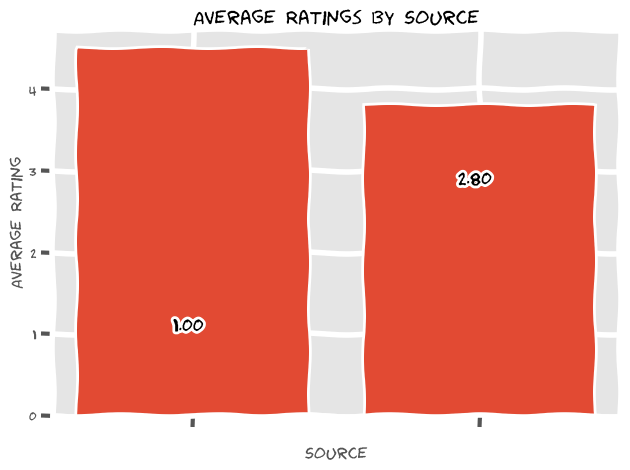

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import emoji
from matplotlib.font_manager import FontProperties
Humor_Sans = FontProperties(fname='/Humor Sans.ttf')
Fairytail_p7P41 = FontProperties(fname='/Fairytail-p7P41.ttf')
Qdbettercomicsansbold_511d8 = FontProperties(fname='/Qdbettercomicsansbold-511d8.ttf')
NotoColorEmoji_Regular = FontProperties(fname='/NotoColorEmoji-Regular.ttf')
comic_neue_bold = FontProperties(fname='/ComicNeue-Bold.ttf')
comic_neue_regular = FontProperties(fname='/ComicNeue-Regular.ttf')
ComicSansMS3 = FontProperties(fname='/ComicSansMS3.ttf')

# Sample data (Replace this with your actual dataset)
data = {
    'source': ['Google Play', 'App Store'],
    'rating': [4.5, 3.8],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Use a different style (e.g., 'ggplot') to support emoji display
plt.style.use('ggplot')

# Create the bar plot
fig, ax = plt.subplots()
emoji_labels = [emoji.emojize(":star:") * int(rating) for rating in df['rating']]
ax.bar(df['source'], df['rating'])
ax.set_xticklabels(emoji_labels)
ax.set_xlabel('Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings by Source')

for i, rating in enumerate(rating_avg):
    plt.text(i, rating + 0.1, f"{rating:.2f} 🤣", ha='center', va='center', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [78]:
!pip install pandas matplotlib


Streaming output truncated to the last 5000 lines.


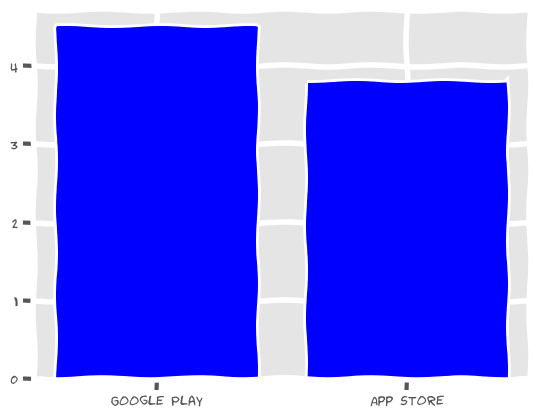

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# Sample data (Replace this with your actual dataset)
data = {
    'source': ['Google Play', 'App Store'],
    'rating': [4.5, 3.8],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Use a different style (e.g., 'ggplot') for the plot
plt.style.use('ggplot')

# Create a figure and axis
fig, ax = plt.subplots()

# Set the initial bar plot
bars = ax.bar(df['source'], df['rating'], color='b')

# Function to update the plot for each frame (animation step)
def update(frame):
    # Update the height of the bars with the rating values
    for bar, rating in zip(bars, df['rating']):
        bar.set_height(frame * rating / 100)  # Adjust the divisor to control the animation speed

# Create the animation
animation = FuncAnimation(fig, update, frames=range(101), repeat=False, blit=False)

# Save the animation to a file (e.g., gif or mp4) or display it inline in the notebook
# Note: If running in Google Colab, the animation might not be displayed inline. You can save it to a file instead.
animation.save('animated_plot.gif', writer='pillow')  # Save to a gif file

# Display the animation inline (this might not work in Google Colab)
plt.show()
